In [2]:
from matplotlib.patches import Rectangle

import random
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
def _set_seeds(seed):


    """ sets all the required seed values for a run"""
        

    random.seed(seed)
    np.random.seed(seed) 
    os.environ['PYTHONHASHSEED'] = str(seed)
    try:
        import tensorflow as tf
        tf.random.set_seed(seed)
    except Exception as e:
        pass    
    try:
        import torch
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.use_deterministic_algorithms(True)
        torch.manual_seed(seed)
    except Exception as e:
        pass

## CREATE DATASET

In [ ]:
from random import uniform,randint,choice

name='GAD'
_set_seeds(40) 
def gen_coords(person,nationality,gender,x1, y1, n,anomalous,pairs,traj_pair_details,noise):
    total_timestamps=n
    x,y,details=[x1],[y1],[]
    x_point,y_point=x1,y1
    x.append(x1)
    y.append(y1)
    timestep=0
    ts,te=random.choice(pairs)
    #print(person)
    #print('randomly selected:',ts,te,anomalous)
    traj_pair_details[person]=[ts,te]
    
    
    rand_list=list(range(ts,te+1))
    #x=list(range(8,31))
    #print(x)

    noise_list=[]
    normal_list=[]

    op=True
    while(len(rand_list)>2):
        if op==False:
            #print('333.....')
            #print(rand_list[:3])

            noise_list.extend(rand_list[:3])
            rand_list=rand_list[3:]
            op=True
        else:
            #print('44444.....')
            #print(rand_list[:4])

            normal_list.extend(rand_list[:4])
            rand_list=rand_list[4:]
            op=False


    #print(normal_list,noise_list)    
    #print(new,int(noise*len(new)))
    
    #sys.exit(0)
    c=0
    
    while(timestep<=total_timestamps):
        #target_point=0
        
        if ts<=timestep<=te and anomalous==1:
            
            #target_point=1
            if timestep in noise_list:
                x_rand=0+noise*5
                y_rand=2+noise/10                    
                
            
            else:
                x_rand=0
                y_rand=2
                
            
            
        else:
            x_rand=randint(1,3)
            y_rand=randint(-6,8)
            while y_rand==0:
                    #print(y_rand)
                    y_rand=randint(-6,8)
                    
        
        
        if timestep in normal_list:
            prev_x=x_rand
            prev_y=y_rand
        
        x.append(x_point+x_rand)
        y.append(y_point+y_rand)
        #print('-----',timestep,target_point)
        details.append([timestep,person,nationality,gender,x_point+x_rand,y_point+y_rand,anomalous])
        #if timestep in normal_list:
        x_point=x_point+x_rand
        y_point=y_point+y_rand
        
        #print(x_point,y_point,timestep)
        #if timestep==total_timestamps/2:
        #    print('halfway----',x_point+x_rand,y_point+y_rand)
        timestep+=1
        c+=1
        
    #target_point=0 
    #plt.scatter(x, y)
    #plt.figure(figsize=(20, 7), dpi=80)
    if anomalous:
        
        plt.plot(x,y, 'r-',marker='o')
        #plt.show()
    else:
        plt.plot(x,y, 'xb-',marker='o')
    #x.append(x2)
    #y.append(y2)
    return x,y,details,traj_pair_details



<ipython-input-12-f9f934272188>:101: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "xb-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(x,y, 'xb-',marker='o')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


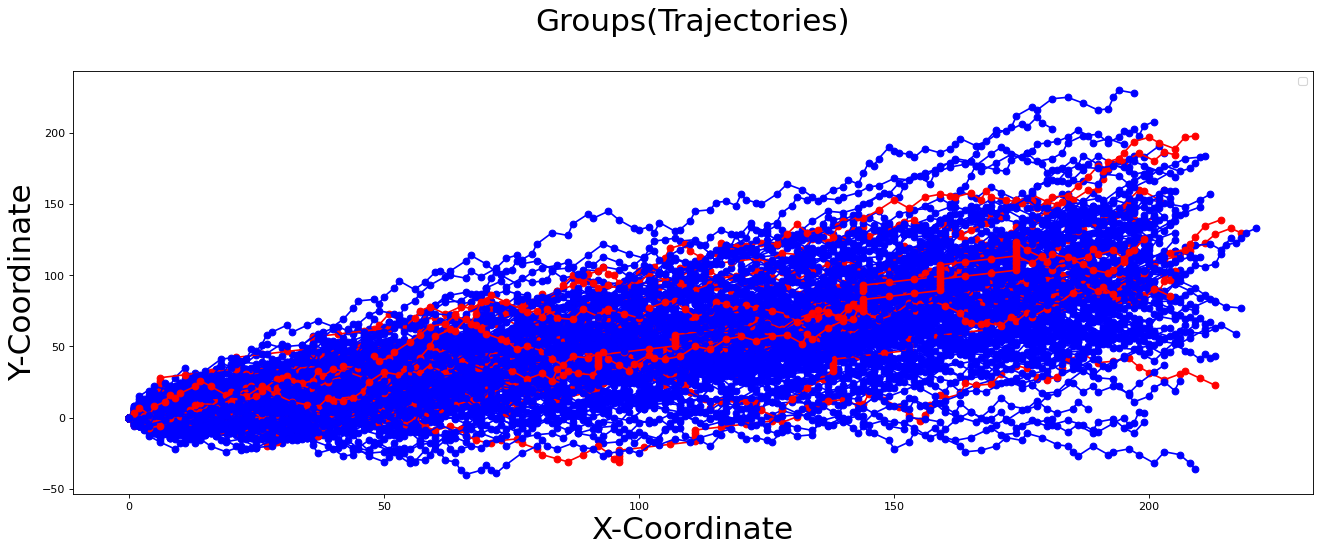

<Figure size 1440x2880 with 0 Axes>

In [12]:

steps=100
             # {dataset_number:[total_trajectories,random_pairs_of_contionus_anomalies,anom_trajectories]}
dataset_dict={
            9:[150,[[3,23],[21,44],[46,59],[69,87]],  # Noise dataset
                 [6,56,67,8,80,93,112,76,82,74,34,4,99,101,110,149,144,139],steps] ,
            10:[6,[[8,30],[30,50],[50,80],[20,40]],             #anomalous sample data
                 [1,3,5],steps]
             }


###choose dataset number to create start
dataset_number=9
###choose dataset number to create end###########
noise=1.0# i.e   


trajectories=dataset_dict[dataset_number][0]


plt.figure(figsize=(20, 7), dpi=80)
init_x=0
init_y=0




max_x=0
max_y=0
data=[]

pairs=dataset_dict[dataset_number][1]
anom_trajectories=dataset_dict[dataset_number][2]

if len(anom_trajectories)==0:
    dataset_type='norm'
else:
    dataset_type='anom'

    
    
traj_pair_details={}





for p in range(1,trajectories+1):
    #anomalous=False
    if p in anom_trajectories: 
        anomalous=1
        
    else:
        anomalous=0
    gender=choice(['male','female'])
    nationality=choice(['Indian','German','American','African','Chinese'])
    
    x,y,details,traj_pair_details=gen_coords(p,nationality,gender,init_x,init_y,steps-1,anomalous,pairs,
    traj_pair_details,noise)
    
    init_x+=0
    init_y+=0
    data.append(details)
    if max(x)>max_x:
        #print(x)
        max_x=max(x)
    if max(y)>max_y:
        #print(y)
        #print(max(y))
        max_y=max(y)
    #print(x,y,np.array(details))
    
#print(max_x,max_y)
#print(traj_pair_details)
#plt.xticks(np.arange(0, max_x+1, 1))
#plt.yticks(np.arange(0, max_y+1, 1))
plt.xlabel('X-Coordinate',fontsize=28)
plt.ylabel('Y-Coordinate',fontsize=28)
plt.legend()
plt.title('Groups(Trajectories)\n',fontsize=28)
plt.figure(figsize=(20,40))
plt.show()
#print([i for i in data])
new_data=sorted([list(j)  for i in np.reshape(a=np.array(data) ,newshape=(1,trajectories*(steps),len(details[0]))) for j in i],key=lambda x: int(x[0]))







## SAVE DATASET AS .CSV


In [13]:
import csv 

heads = ['Timestep','Person', 'Nationality', 'Gender','X_Coord','Y_Coord','Target'] 
#filename = "Trajectorys_30_50_10p_100t_latest.csv"

print(dataset_dict[dataset_number])
if dataset_dict[dataset_number][0] in [6]:  # normal /anomalous dataset sample
    filename=f'Trajectorys2__{dataset_type}_noise_sample.csv'
else:
    filename = f"Trajectorys2_{steps}_{trajectories}_{dataset_type}{noise}.csv"
    print(filename)
with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(heads) 
    csvwriter.writerows(new_data)

[150, [[3, 23], [21, 44], [46, 59], [69, 87]], [6, 56, 67, 8, 80, 93, 112, 76, 82, 74, 34, 4, 99, 101, 110, 149, 144, 139], 100]
Trajectorys2_100_150_anom1.0.csv


## LOAD DATASET TO PLOT

<ipython-input-5-9fd917ee43d8>:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_data=nn.Linear(torch.tensor(coords_scaled).shape[1],1)(torch.tensor(coords_scaled))


150 6 14999
[[3, 23], [21, 44], [46, 59], [69, 87]]


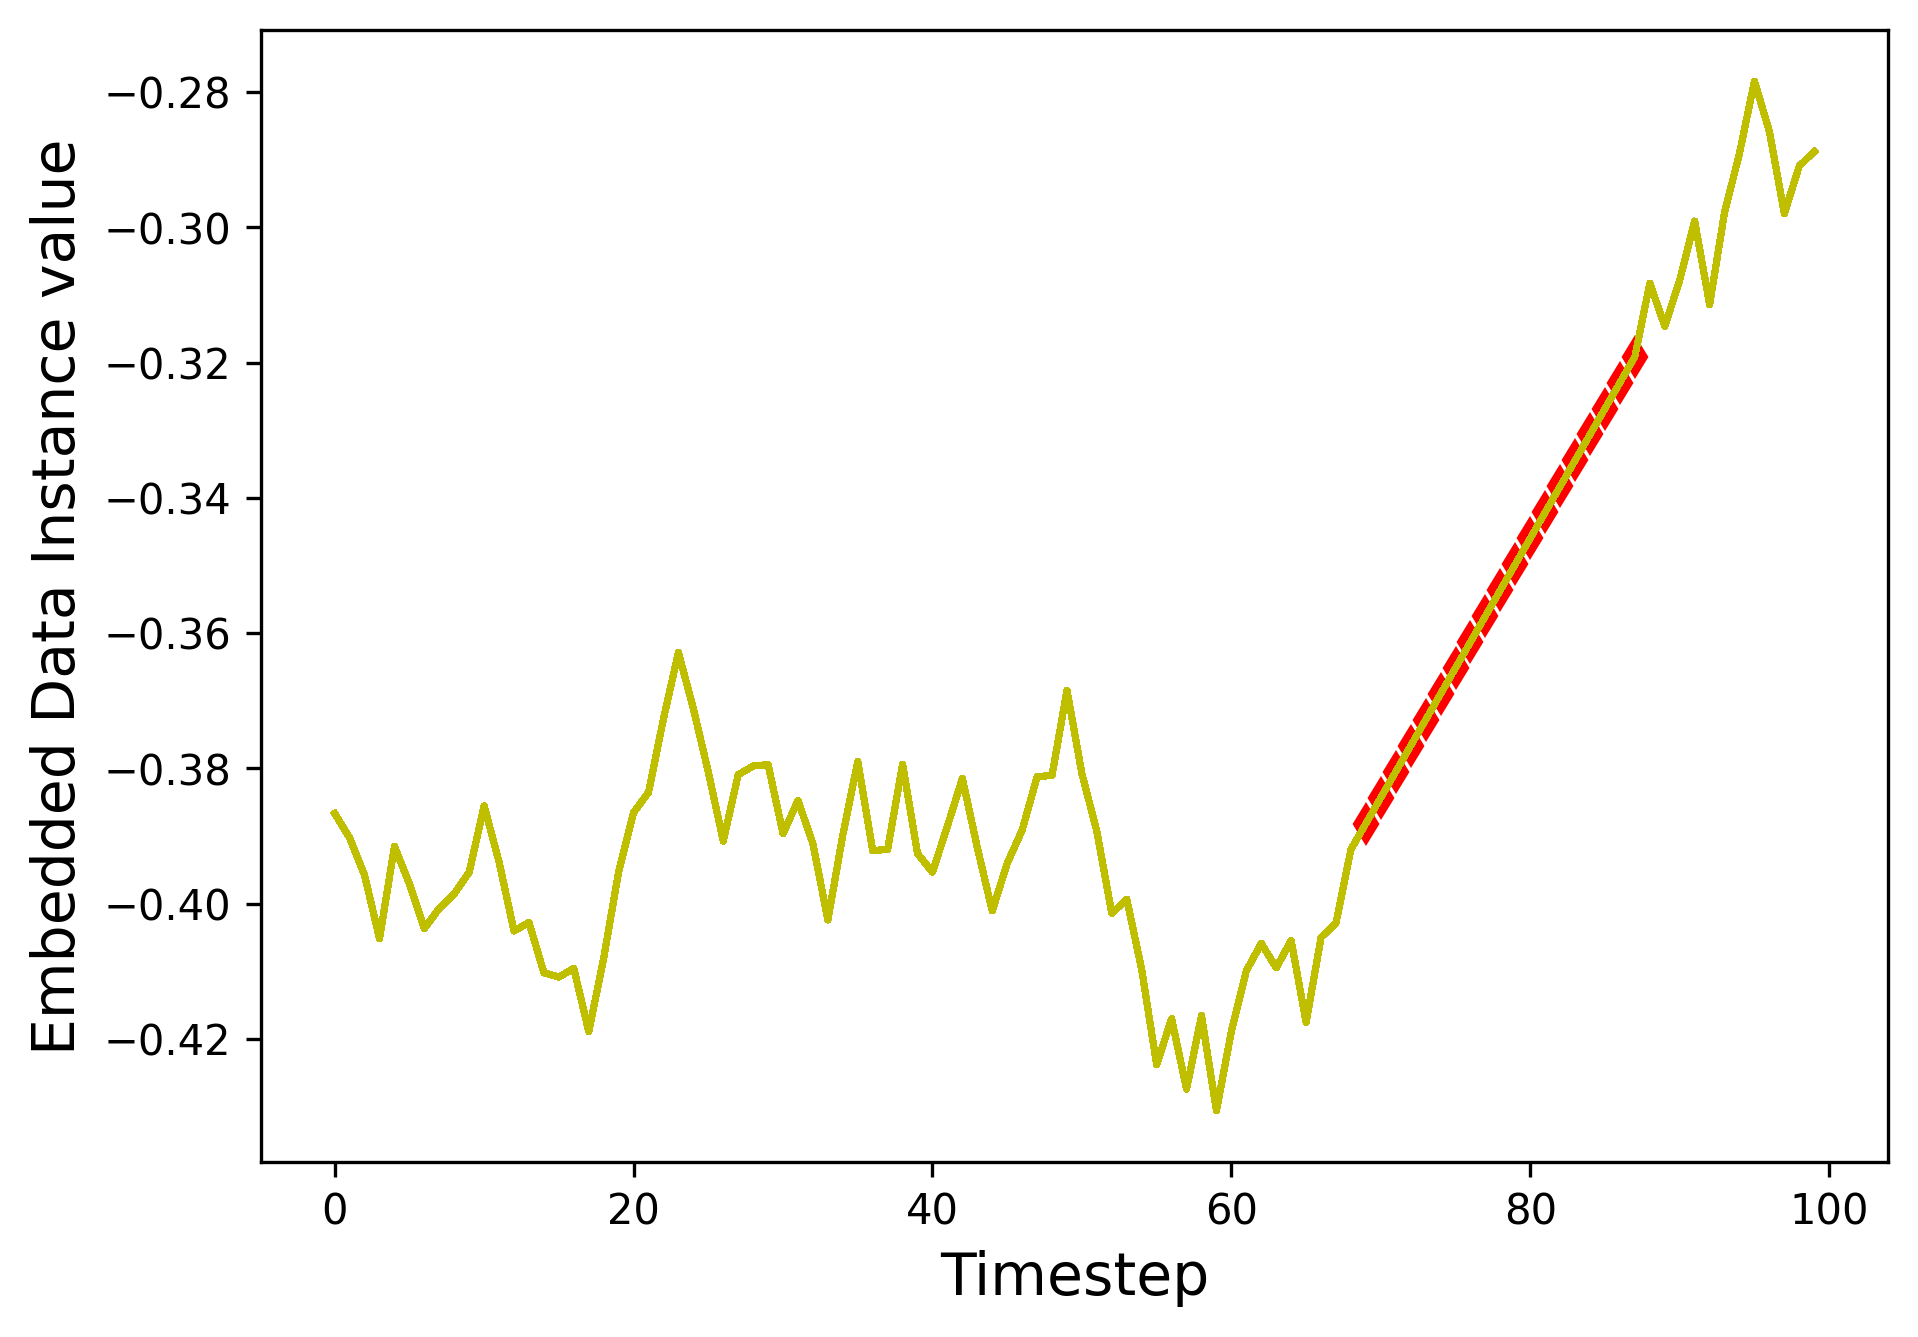

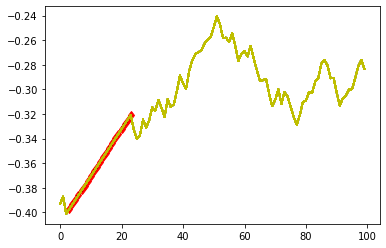

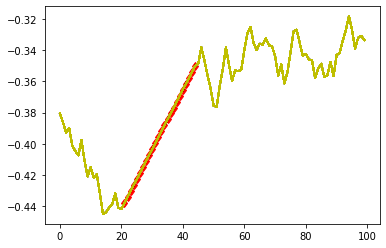

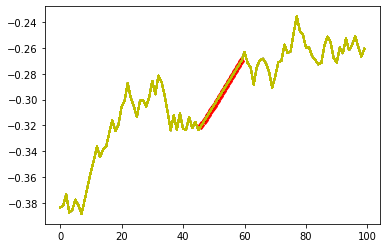

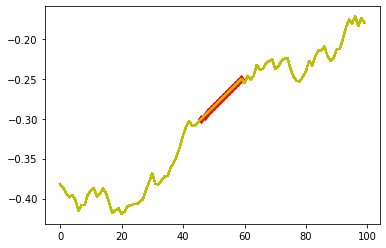

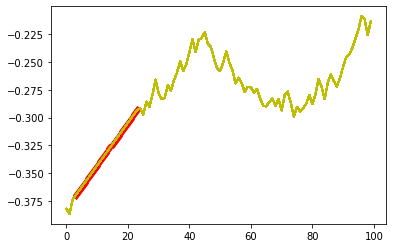

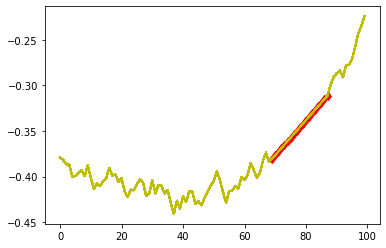

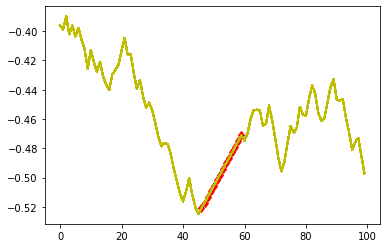

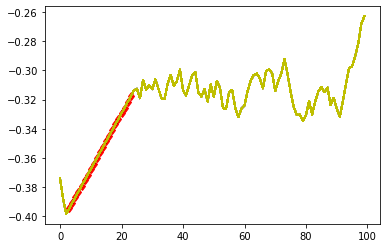

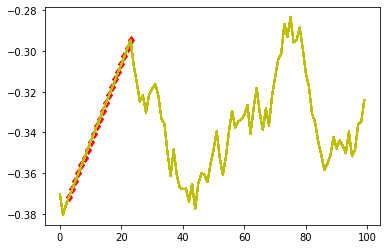

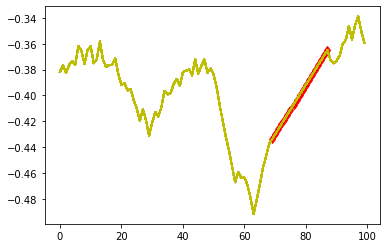

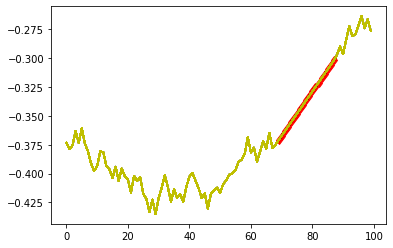

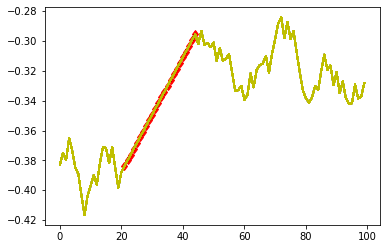

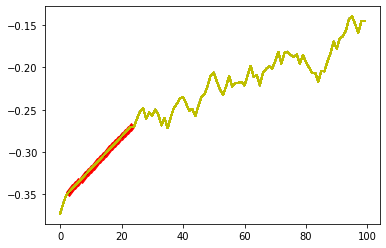

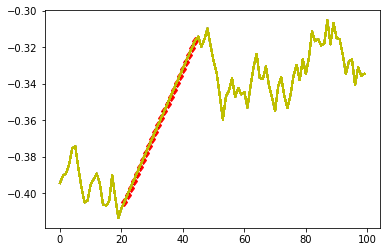

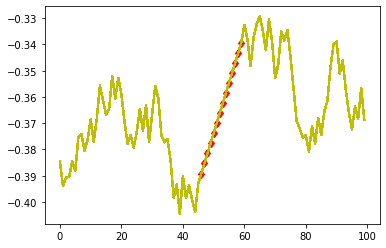

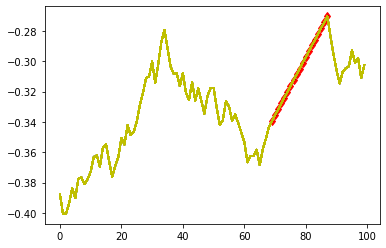

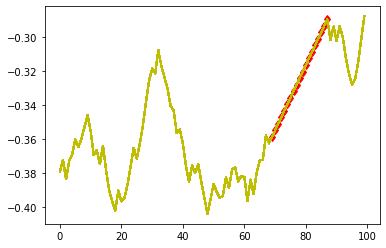

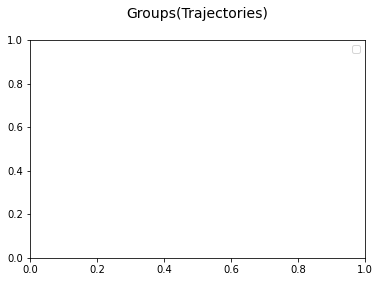

In [5]:
import pandas as pd
import numpy as np

#filename="Trajectorys_100_1_3_5_7_29_50_x_y.csv"
df = pd.read_csv(filename)
persons=trajectories
#data=df.to_numpy()
#data=np.array(list((map(lambda x:list(x[-2:]),data))))
#for i in data:
#    print(i)
    
trajecs=list(range(1,persons+1))    
coords=None
for traj in trajecs:      # set(i for i in df.traj)

            #trajectories[f'T{traj}']=eval(f'df1[init:init1]').to_numpy()  
            df_temp=df.loc[df['Person'] == traj]
            df_temp=df_temp[['X_Coord','Y_Coord']].to_numpy()
            try:
                coords=np.vstack((coords,df_temp))
            except:
                coords=df_temp
#print(coords,coords.shape)

#for i in coords:
#    print(i)

import torch.nn as nn
import torch
from sklearn.manifold import TSNE,MDS,Isomap
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler


                        
                           
mm_scaler=MinMaxScaler()#
#mm_scaler=RobustScaler()

#mm_scaler=StandardScaler()

mm_scaler.fit(coords)

coords_scaled=mm_scaler.transform(coords)
#coords_scaled=torch.from_numpy(coords).float()
#print(coords_scaled)
coords_scaled=torch.from_numpy(coords_scaled).float()                           
#print(torch.tensor(coords),torch.tensor(coords).shape)
n=len(coords_scaled)-1
#reducer = Isomap(n_neighbors=n, n_components=1) 

#new_data = reducer.fit_transform(coords_scaled)'''
new_data=nn.Linear(torch.tensor(coords_scaled).shape[1],1)(torch.tensor(coords_scaled))
#              )
new_data=new_data.detach().flatten().numpy()
#print(new_data,new_data.shape)
#

#for i in new_data:
#    print(i)
l=len(df.Person.unique())
m=len(df.columns)-1
n=len(df.iloc[:,-2:].to_numpy())-1
print(l,m,n)
trajecs=list(range(1,persons+1))    
#labels=None
for traj in trajecs:      # set(i for i in df.traj)

            #trajectories[f'T{traj}']=eval(f'df1[init:init1]').to_numpy()  
            df_temp=df.loc[df['Person'] == traj]
            df_temp=df_temp[['Target']].to_numpy()
            #print(df_temp)
            try:
                labels=np.vstack((labels,df_temp))
            except:
                labels=df_temp
                
new_data=np.reshape(new_data,(l,(n+1)//l))
labels=np.reshape(labels,(l,(n+1)//l))


'''from numpy import asarray
from numpy import save



save_data=np.vstack((new_data,labels))




save('Trajectorys_97_85_norm.npy', save_data)'''


plt.figure(figsize=(7, 5), dpi=300)
plt.xlabel('Timestep',fontsize=14)
plt.ylabel('Embedded Data Instance value',fontsize=14)
#plt.legend()
print(pairs)
#anom_start=pairs[0][0]
#anom_end=pairs[0][1]
min_point=10000
max_point=-10000
anom_trajecs=anom_trajectories

for traj,points in zip(df.Person.unique(),new_data):   # for synthetic only cooridnates plot
    
    
    if traj in anom_trajecs:
            
            
            points_list=[]
            points_modified=[]
            for i,j in list(enumerate(points)):
                
                anom_start,anom_end=traj_pair_details[traj]
                
                anom_list=list(range(anom_start,anom_end+1))
                
                if i in anom_list:
                    flag=True
                    plt.plot(i,j,'r',marker='d',label='Anomalous_Group_Part')
                    #print(i,j)
                    points_list.append(j)
            
            #print(points,len(points))   
            #print(points_list,len(points_list),'k') 
            
            points_modified=[i for i in points if i not in points_list]
            #print(points_modified,len(points_modified)) 
            if flag:
                
                for i,j in list(enumerate(points)):
                
                    plt.plot(range(len(points)),points,'y',label='Anomalous_Group')
                    flag=False
            plt.show()
                
                    

            
            
    else:
        #plt.plot(range(len(points)),points,color='b',label='Normal_Group')
        #plt.show()
        pass


#print((anom_start,min_point), anom_end-anom_start,abs(min_point)+abs(max_point))
#ax.add_patch(Rectangle((anom_start,min_point), anom_end-anom_start,abs(max_point)-abs(min_point),fill=None))
#print(min_point,max_point)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1, 1))
plt.title(f'Groups(Trajectories)\n',fontsize=14)
plt.show()